In [32]:
import numpy as np 
import pandas as pd
import sklearn as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement:

1. Perform Data Preprocessing & prepare data for analysis & Modelling

In [33]:
df = pd.read_csv('C:\\Users\91990\Downloads\kidney_disease.csv')
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [34]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [35]:
description = pd.read_csv('C:\\Users\91990\Downloads\Project 2-Chronic Kidney Disease-20220427T121455Z-001\Project 2-Chronic Kidney Disease\data_description.txt', sep = '-')
description = description.reset_index()
description.columns=['Symbol', 'Description']
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [36]:
# rename the abbrevaited column names with full version
df.columns = description['Description'].values
df.info()   # convert string to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [37]:
def convert(df, feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')



In [38]:
features = ['packed cell volume', 'white blood cell count' ,  'red blood cell count']
for feature in features:
    convert(df, feature)
    
df.drop('id', axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          248 non-null    object 
 6    pus cell                335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

 Data Cleaning

In [39]:
def extract_columns(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'O']
    num_col = [col for col in df.columns if df[col].dtype != 'O']
    return cat_col, num_col

In [40]:
cat_col, num_col = extract_columns(df)
cat_col 

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [41]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [42]:
for col in cat_col:
    print('{} has values {}'.format(col,df[col].unique()))
    print('\n')

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' '\tno' '\tyes' nan]


coronary artery disease has values ['no' 'yes' '\tno' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'ckd\t' 'notckd']




In [49]:
df['diabetes mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes'},inplace=True)
df['coronary artery disease'].replace(to_replace={'\tno': 'no'},inplace=True)
df['class']=df['class'].replace(to_replace='ckd\t', value= 'ckd')   # chronic kidney disease

In [68]:
for col in cat_col:
    print('{} has values {}'.format(col,df[col].unique()))
    print('\n')
df

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' nan]


coronary artery disease has values ['no' 'yes' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'notckd']




,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Analysis Distribution of numberical columns in the data

In [51]:
len(num_col)

14

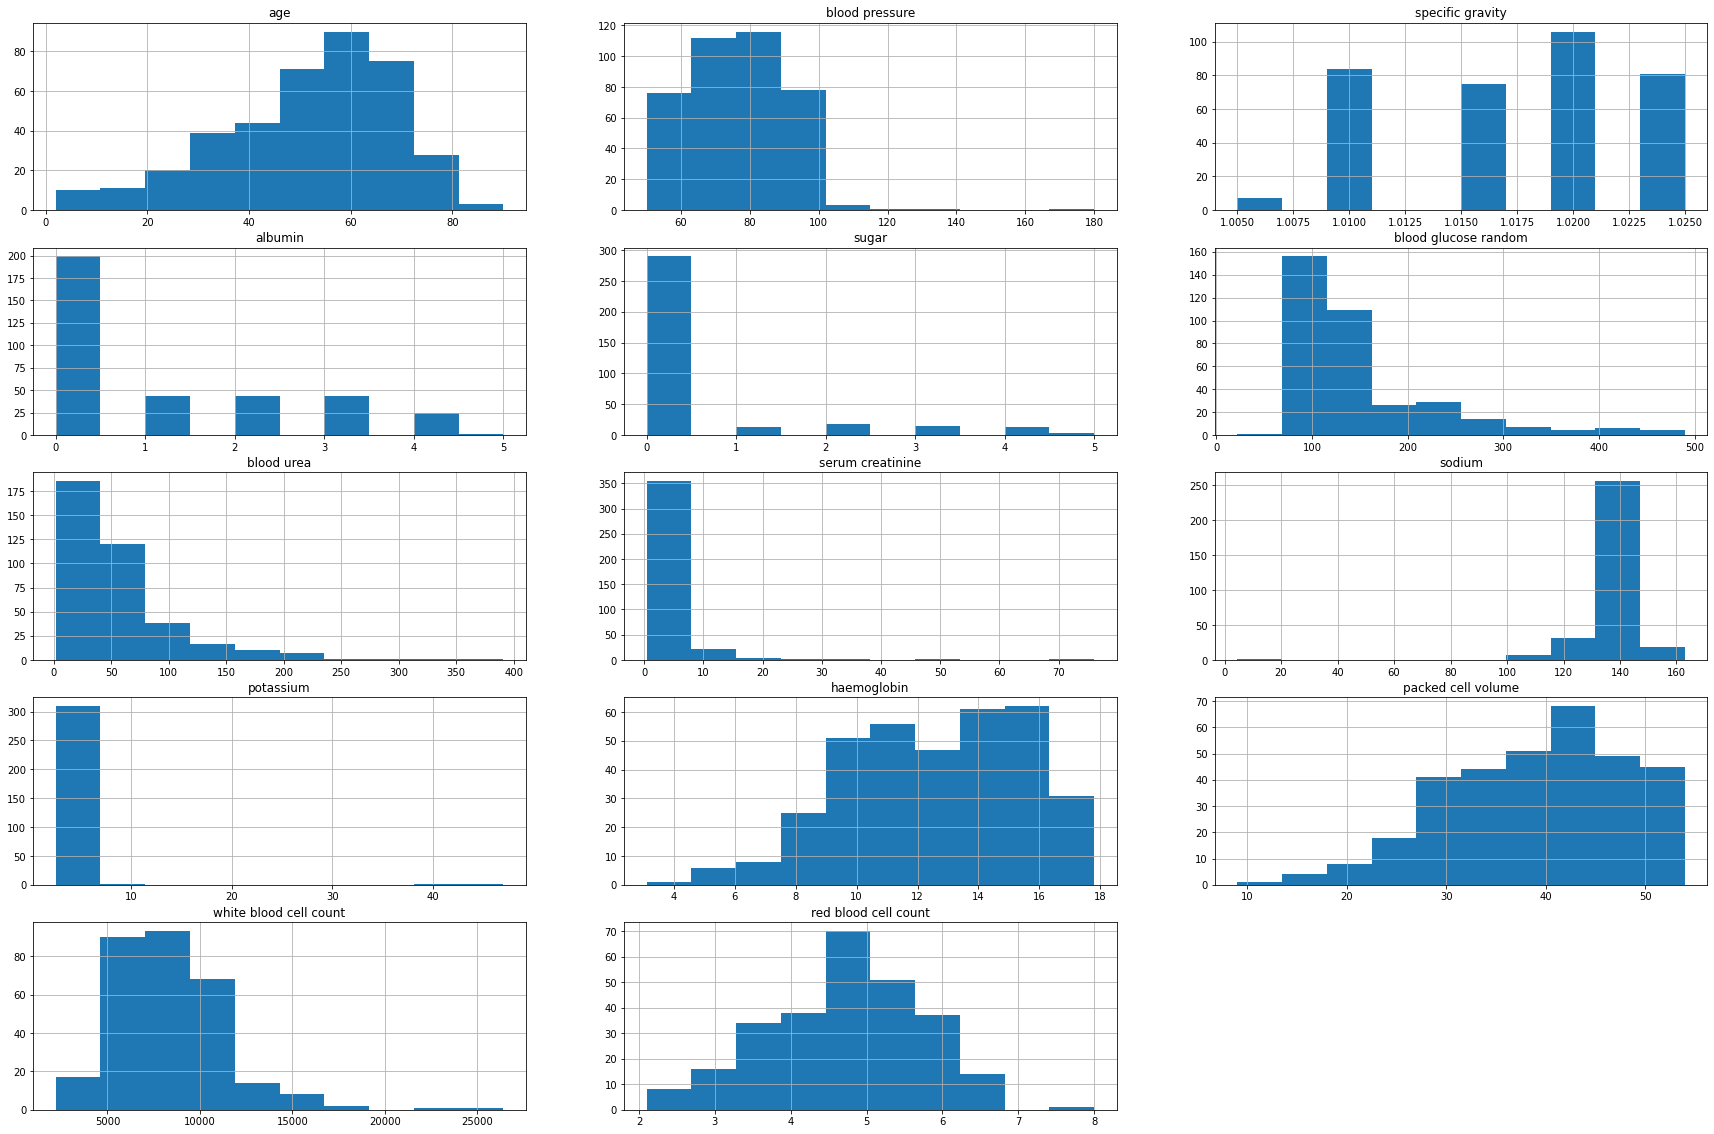

In [55]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)    # 5 rows, 3 columns; review why i+1 video 41 i =0 in this case as it is not defined, to iterate over it an i+1 value is given in the for loop
    df[feature].hist()
    plt.title(feature)

Check Label distribution of categorical columns in

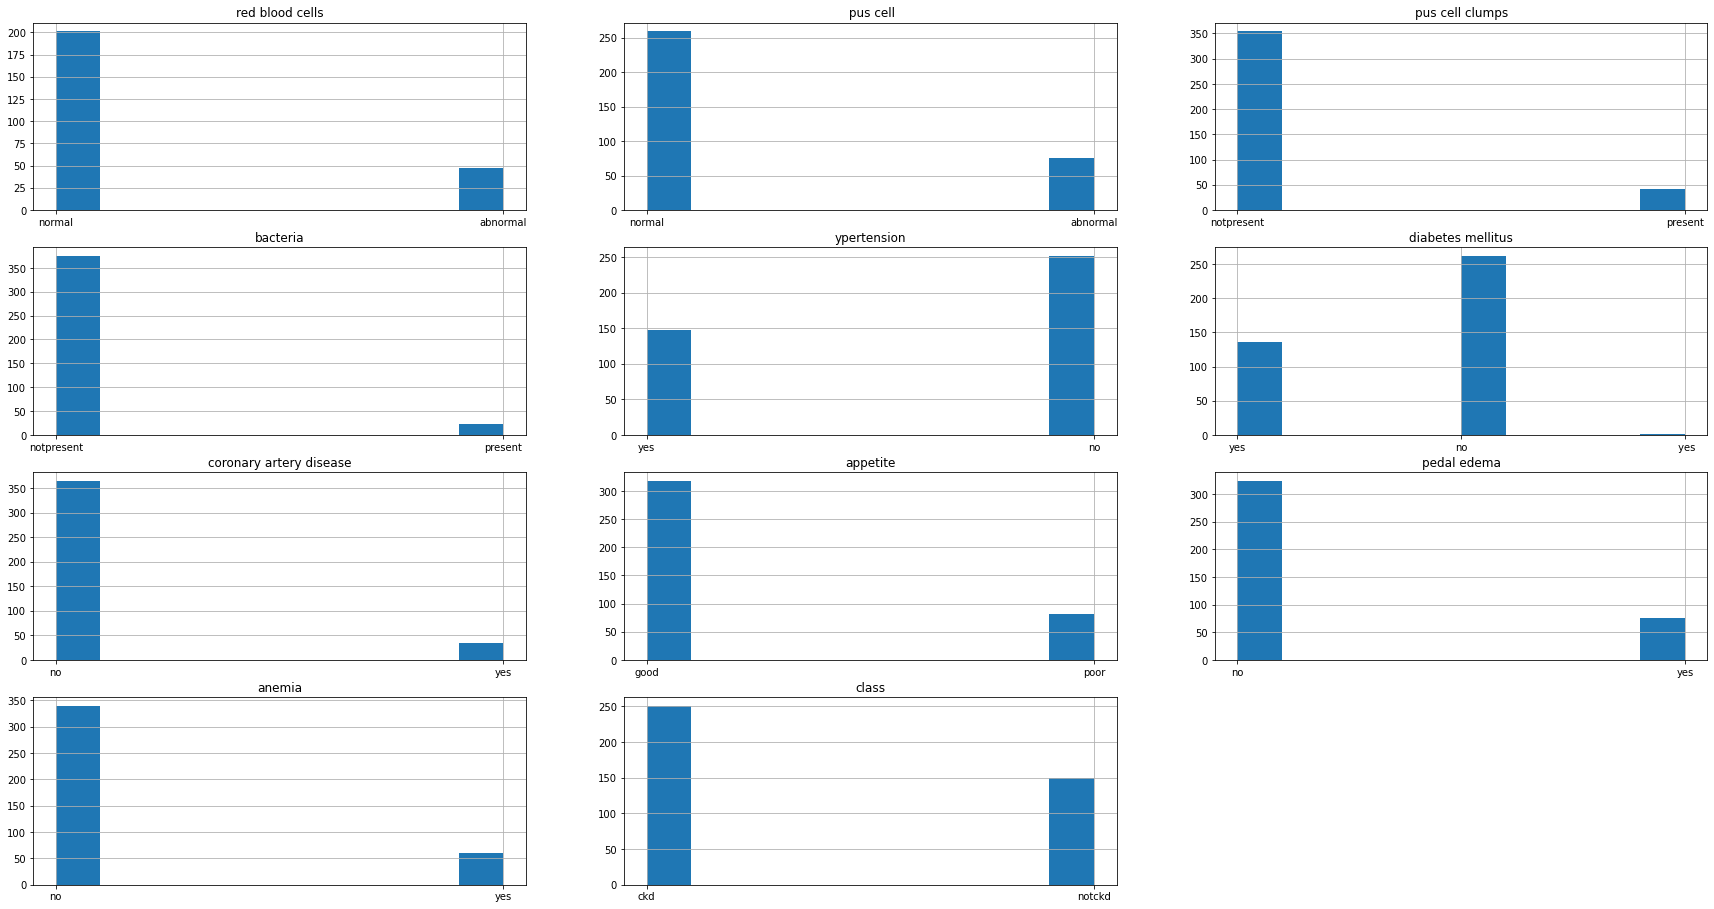

In [57]:
# ckd, not ckd
plt.figure(figsize=(30,20))

for i,feature in enumerate(cat_col):
    plt.subplot(5,3,i+1)    # 5 rows, 3 columns; review why i+1 video 41 i =0 in this case as it is not defined, to iterate over it an i+1 value is given in the for loop
    df[feature].hist()
    plt.title(feature)
    

C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

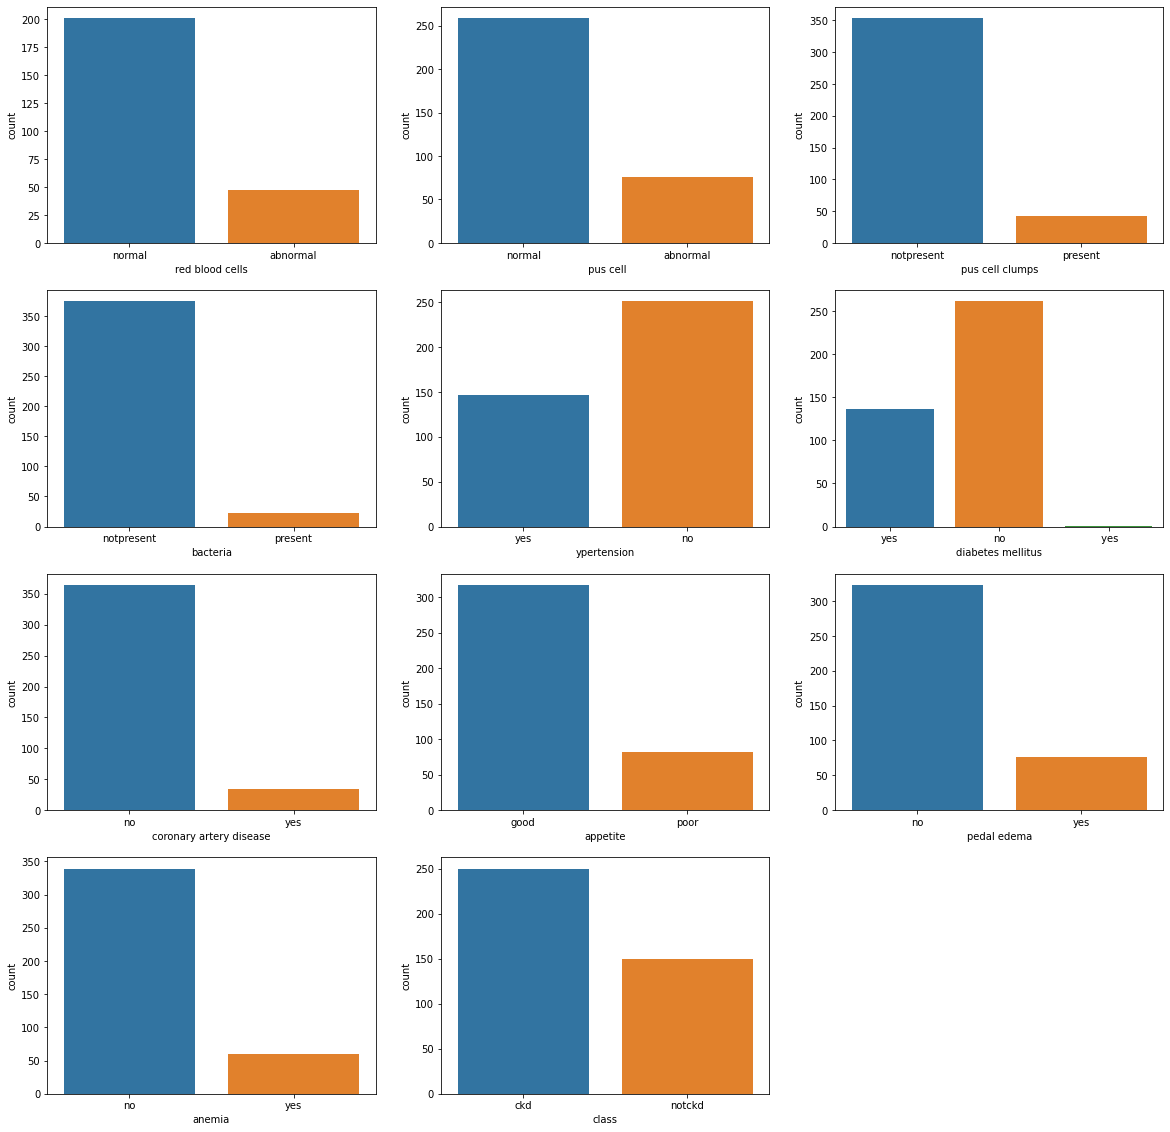

In [61]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)    # 5 rows, 3 columns; review why i+1 video 41 i =0 in this case as it is not defined, to iterate over it an i+1 value is given in the for loop
    sns.countplot(df[feature])
    

C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

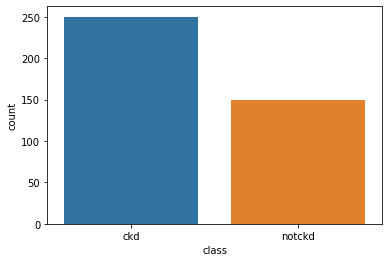

In [62]:
sns.countplot(df['class'])

Check Corelation of data

<AxesSubplot:>

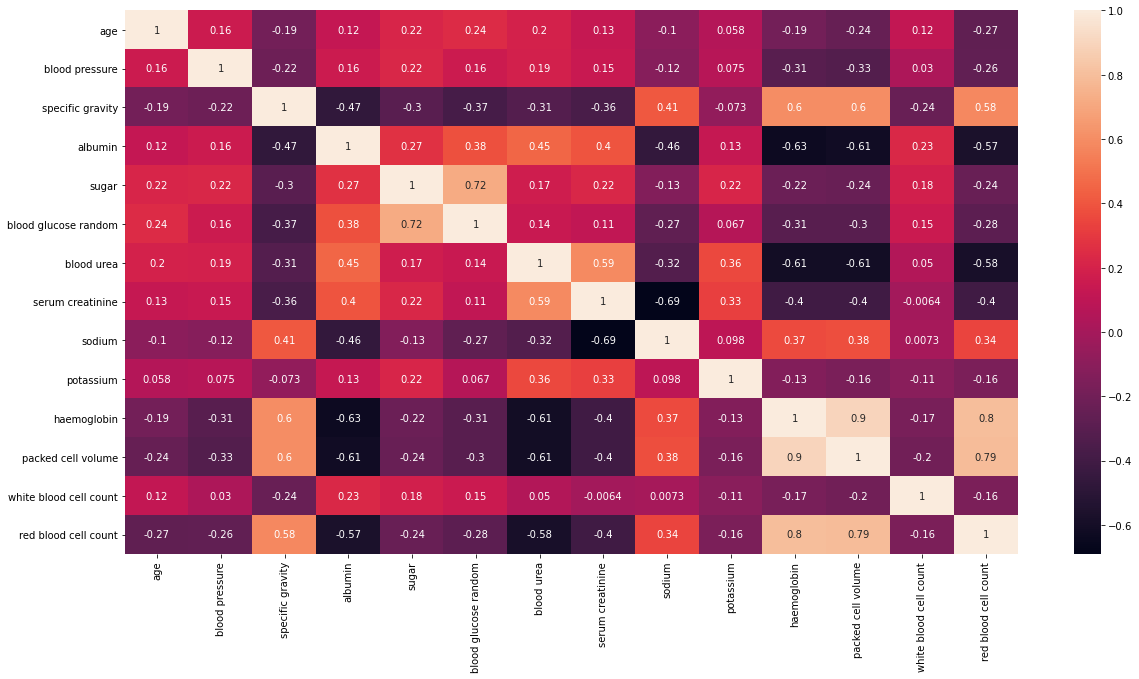

In [66]:
plt.figure(figsize=(20,10))
df.corr()
sns.heatmap(df.corr(), annot=True)

In [71]:
df.groupby(['red blood cells', 'class'])['red blood cell count'].agg(['count', 'mean', 'median', 'min', 'max'])
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [79]:
# check impact on target variable
import plotly.express as px
plt.figure(figsize=(10,10))
px.violin(df,y ='red blood cell count', x='class', color='class' )

<Figure size 720x720 with 0 Axes>

Automate analysis

FInd relationship btw hbg and packed cell volume

In [78]:
plt.figure(figsize=(10,10))
px.scatter(df,x = 'haemoglobin', y = 'packed cell volume')

<Figure size 720x720 with 0 Axes>

In [89]:
# Dist of rbc in ckd and nonckd
def kde_plot(feature):    
    grid =sns.FacetGrid(df, hue='class', aspect =5)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()


In [87]:
def violin(col):
    fig =px.violin(df, y = col,x = 'class', color= 'class', box = True)
    return fig.show()

In [88]:
def scatters(col1, col2):
    fig =px.scatter(df, x=col1, y =col2, color = 'class')
    return fig.show()

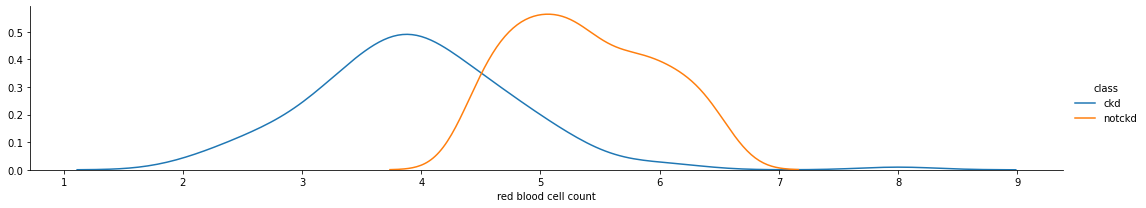

In [90]:
kde_plot('red blood cell count') # high rbc less ckd; insight

EDA

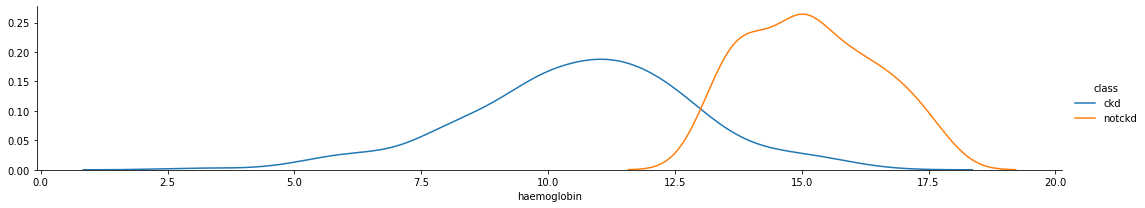

In [91]:
kde_plot('haemoglobin') # indicates rbc reduces prob of having ckd

In [92]:
scatters('red blood cell count','packed cell volume')


In [93]:

scatters('red blood cell count','haemoglobin')

In [94]:
scatters('packed cell volume','haemoglobin')

In [95]:
violin('red blood cell count')

In [96]:
violin('packed cell volume')

In [98]:
scatters('red blood cell count', 'albumin')

Dealing with Missing Value

Options:

1. Fillna with mean, median, std dev (depending on the case) -basic method
Not possible for categorical data types

2. Fill with random values

In [101]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

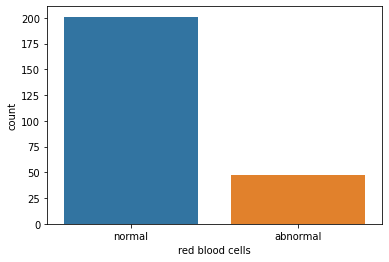

In [105]:
sns.countplot(df['red blood cells'])


In [166]:
copy = df.copy()
copy['red blood cells'].dropna().sample()

364    normal
Name: red blood cells, dtype: object

In [167]:
copy['red blood cells'].isnull().sum()

152

In [168]:
random_sample =copy['red blood cells'].dropna().sample(152)
random_sample


257      normal
187      normal
292      normal
232    abnormal
371      normal
         ...   
137      normal
311      normal
198      normal
374      normal
114    abnormal
Name: red blood cells, Length: 152, dtype: object

In [169]:
random_sample.index = copy[copy['red blood cells'].isnull()].index    # make sure index  is equal video 45
random_sample

0        normal
1        normal
5        normal
6      abnormal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381    abnormal
Name: red blood cells, Length: 152, dtype: object

In [170]:
copy.loc[copy['red blood cells'].isnull(), 'red blood cells'] = random_sample


In [171]:
copy['red blood cells'].isnull().sum()

0

C:\Users\91990\Downloads\Data Science\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

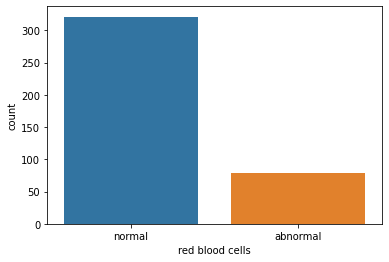

In [172]:
sns.countplot(copy['red blood cells'])

In [173]:
def Random_value_imputation(feature):
    random_sample =copy[feature].dropna().sample(copy[feature].isnull().sum())
    random_sample.index = copy[copy[feature].isnull()].index
    copy.loc[copy[feature].isnull(), feature] = random_sample

Cleaning Missing Value using above functions

In [174]:
copy[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [175]:
for col in num_col:
    Random_value_imputation(col)

In [176]:
copy[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [177]:
copy[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [178]:
Random_value_imputation(' pus cell')

In [179]:
copy['pus cell clumps'].mode()[0]   # fill categorical with most common attribute

'notpresent'

In [180]:
def impute_mode(feature):
    mode=copy[feature].mode()[0]
    copy[feature]=copy[feature].fillna(mode)

In [181]:
for col in cat_col:
    impute_mode(col)

In [182]:
copy[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

Apply Feature Encoding:

Need to convert categorical data into numerical format as ML model only takes numerical format to compute,; use different techniques to replace the string with a numerical value

In [183]:
for col in cat_col:
    print('{} has {} categories'.format(col,copy[col].nunique()))    # nunique tells you how many (count) of categories in the column; unique() will display the names of the unique names

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [184]:
# label encoding- assign numerical label to categorical name
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [185]:
for col in cat_col:
    copy[col] =le.fit_transform(copy[col])

In [186]:
copy

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,208.0,...,38.0,6000.0,5.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.7,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


Select best features for model

Feature Selection Techniques

In [187]:
# if i have 100 labels 
from sklearn.feature_selection import SelectKBest

# use chi square test to check goodness of fit - class will check if p value is less than 0.5 or not, based on p value it will order features for model buildings and

from sklearn.feature_selection import chi2

In [188]:
ind_col = [col for col in copy.columns if col != 'class']
dep_col = 'class'

In [189]:
X = copy[ind_col]
y = copy[dep_col]

In [190]:
X

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,208.0,...,11.3,38.0,6000.0,5.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.7,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [193]:
ordered_rank_features = SelectKBest(score_func=chi2, k =20)
ordered_features = ordered_rank_features.fit(X,y)

In [195]:
ordered_features.scores_

array([1.12566358e+02, 8.39353575e+01, 5.83898951e-03, 2.47800000e+02,
       1.03800000e+02, 8.72793354e+00, 1.45019608e+01, 2.52000000e+01,
       1.32000000e+01, 2.77766995e+03, 2.25824800e+03, 3.54589973e+02,
       3.13455446e+01, 3.17741935e+00, 1.16684188e+02, 3.03303242e+02,
       1.33960307e+04, 1.92272321e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [198]:
datascores = pd.DataFrame(ordered_rank_features.scores_, columns = ['score'])
datascores

,score
0,112.566358
1,83.935357
2,0.005839
3,247.800000
4,103.800000
5,8.727934
6,14.501961
7,25.200000
8,13.200000
9,2777.669945


In [199]:
df_cols = pd.DataFrame(X.columns)
df_cols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [203]:
feature_ranked=pd.concat([df_cols, datascores], axis =1)
feature_ranked

,0,score
0,age,112.566358
1,blood pressure,83.935357
2,specific gravity,0.005839
3,albumin,247.800000
4,sugar,103.800000
5,red blood cells,8.727934
6,pus cell,14.501961
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2777.669945


In [204]:
feature_ranked.columns = ['Feature', 'Score']
feature_ranked

,Feature,Score
0,age,112.566358
1,blood pressure,83.935357
2,specific gravity,0.005839
3,albumin,247.800000
4,sugar,103.800000
5,red blood cells,8.727934
6,pus cell,14.501961
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2777.669945


In [205]:
# take top 10 features
feature_ranked.nlargest(10, columns = 'Score')  # consider these to build the model

,Feature,Score
16,white blood cell count,13396.030732
9,blood glucose random,2777.669945
10,blood urea,2258.248003
11,serum creatinine,354.589973
15,packed cell volume,303.303242
3,albumin,247.800000
14,haemoglobin,116.684188
0,age,112.566358
4,sugar,103.800000
18,ypertension,88.200000


In [209]:
selected_columns =feature_ranked.nlargest(10, columns = 'Score')['Feature'].values

In [210]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [ ]:
X_new = copy[selected_columns]
X_new
print(len(X_new))


In [217]:


X_new.shape
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

Dealing with imbalanced data

If there are a lot of ckd and few no ckd situations like above, leads to skewing because of outliers. 

Then when training the model/validating the model we may notice overfitting and thus imputing bias into the model.

Deal with outliers:

1. Undersampling approach (lib: imblearn, RandomSampler; tensorflow needs to be installed)- data set should be small; usually not possible as real world situatiion wqe will deal with GB/TB/PB of data, sueful in a few thousand data point dataset
eliminate some data points for whatever unique categories in output feat must be in same ratio (data loss as some datapoints will be ommitted, not advisable); 
RandomSampler - not data loss

2. Oversampling*- Large datasets; 

3. Smote Tomek

3. Ensenble Techniques*- RF, XGBoost

95% of use cases have outliers that can be dealth with using (*).

Build a cross-validated model & predict acuracy of the model


In [216]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, test_size=0.25)

In [220]:
print(X_train.shape)

(300, 10)


In [221]:
print(X_test.shape)
# check for imablance by checking mean, median mode

(100, 10)


In [222]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [224]:
# !pip install xgboost

In [225]:
from xgboost import XGBClassifier

In [229]:
#Hyper parameter tuning
params = {
    'learning_rate': [0.05,0.20,0.25],
    'max_depth': [5,8,10],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.4],
    'colsample_bytree': [0.3,0.4,0.7]
    }

In [230]:
from sklearn.model_selection import RandomizedSearchCV

In [231]:
clf = XGBClassifier()

In [235]:
random_search = RandomizedSearchCV(clf,param_distributions= params, n_iter=5,scoring='roc_auc', n_jobs=-1, cv = 5, verbose=3)    # 

In [236]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [242]:
# find best model

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [238]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [244]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1,tree_method='exact',
              validate_parameters=1,verbosity=None)

              # remove missing=nan; remove label encoder

In [245]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [247]:
predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

In [248]:
confusion_matrix(y_test, predictions)

array([[61,  1],
       [ 0, 38]], dtype=int64)

In [250]:
accuracy_score(y_test, predictions)

0.99